# CEH 10m Vs PDNP 12.5cm

#### Data

* 10 m Classified Pixel CEH (most detailed LC from CEH) **LCM_CEH_21**
10 m Classified Pixels have not been generalised by combination with the UKCEH Land Parcel Spatial Framework. This preserves intricate features of the landscape such as narrow linear features and small patches of habitat that fall below the 0.5 hectare minimum mappable unit (MMU) of the UKCEH Land Parcel Spatial Framework

* 12.5 cm Pixel PDNPA **LCM_PDNP_23**
Currently non dissolved data



In [10]:
# Import Libraries
import geopandas as gpd
import matplotlib.pyplot as plt

In [12]:
# Load the shp files (transfer to shapley later)
PDNP_23 = gpd.read_file("C:/Users/alexad/Desktop/lcm/pdnp_23_SK0857.shp") 
CEH_21 = gpd.read_file("C:/Users/alexad/Desktop/lcm/LCM_21_SK0857.shp") 

In [24]:
# create a dict of key
CEH_key = {1: 'Broadleaved woodland',
           2: 'Coniferous woodland',
           3: 'Arable and horticulture',
           4: 'Improved grassland',
           5: 'Neutral grassland',
           6: 'Calcareous grassland',
           7: 'Acid grassland',
           9: 'Fen, marsh and swamp',
           12: 'Inland rock',
           14: 'Fresh water',
           21: 'Suburban'
           }

In [25]:
# remap CEH code to names
CEH_21 = CEH_21.replace({'gridcode': CEH_key})

In [80]:
PDNP_23.head(2)

,lc_label,source,Class_name,Class_na_1,Shape_Leng,Shape_Area,geometry
0,E2a,model prediction,Improved Pasture,None,551.000039,0.303050,"MULTIPOLYGON (((408147.875 358000.000, 408004...."
1,E2b,model prediction,Rough Pasture,None,1.500023,0.000825,"POLYGON ((408929.750 358000.000, 408929.125 35..."


In [94]:
print(PDNP_23.Class_name.unique())

['Improved Pasture' 'Rough Pasture' 'Scrub' 'Broadleaved High Forest'
 'Coniferous High Forest' 'Upland Heath'
 'Wetland, Wet Grassland and Rush Pasture' 'Blanket Peat Grass Moor'
 'Upland Heath/Blanket Peat Mosaic'
 'Clear Felled/New Plantings in Forest Areas' 'Open Water, Inland'
 'Major Transport Routes' 'Quarries and Mineral Workings' 'Urban'
 'Other Isolated Rural Developments (>0.25 ha)' 'Bracken']


In [90]:
CEH_Palette = {'Broadleaved woodland' : 'forestgreen',
           'Coniferous woodland' : 'darkgreen',
           'Arable and horticulture' : 'peru',
           'Improved grassland' : 'lime',
           'Neutral grassland' : 'seagreen',
           'Calcareous grassland' : 'gold',
           'Acid grassland' : 'yellow',
           'Fen, marsh and swamp' : 'darkblue',
           'Inland rock' : 'grey',
           'Fresh water' : 'blue',
           'Suburban' : 'black'
           } 

In [95]:
PDNP_Palette = {'Blanket Peat Grass Moor' : 'forestgreen',
           'Bracken' : 'yellow',
           'Broadleaved High Forest' : 'forestgreen',
           'Clear Felled/New Plantings in Forest Areas' : 'grey',
           'Coniferous High Forest' : 'darkgreen',
           'Improved Pasture' : 'lime',
           'Major Transport Routes' : 'black',
           'Open Water, Inland' : 'blue',
           'Other Isolated Rural Developments (>0.25 ha)' : 'black',
           'Quarries and Mineral Workings' : 'black',
           'Rough Pasture' : 'seagreen',
           'Scrub' : 'turquoise',
           'Upland Heath' : 'purple',
           'Upland Heath/Blanket Peat Mosaic' : 'hotpink',
           'Urban' : 'black',
           'Wetland, Wet Grassland and Rush Pasture' : 'red'
           } 

c:\Users\alexad\Anaconda3\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(
c:\Users\alexad\Anaconda3\lib\site-packages\geopandas\plotting.py:656: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  warnings.warn(


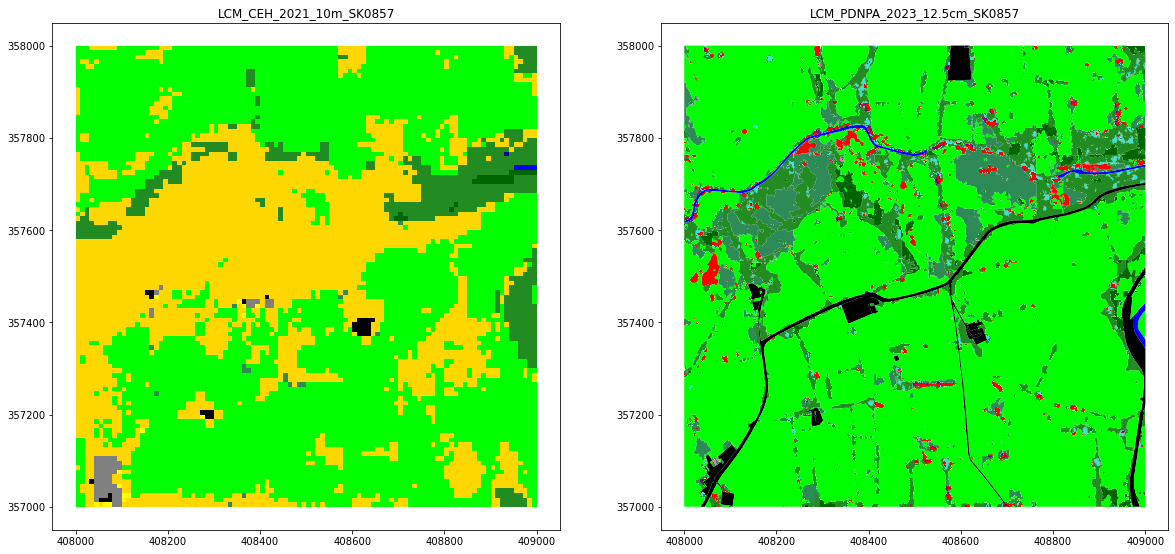

In [96]:
fig, axes = plt.subplots(ncols=2, figsize=(20, 20))

CEH_21.plot('gridcode', color=  CEH_21['gridcode'].map(CEH_Palette), legend = True, ax=axes[0], legend_kwds={'bbox_to_anchor': (1, -0.05)});
PDNP_23.plot('Class_name', color = PDNP_23['Class_name'].map(PDNP_Palette), legend = True, ax=axes[1], legend_kwds={'bbox_to_anchor': (1, -0.05)});
ax=axes[0].set_title('LCM_CEH_2021_10m_SK0857')
ax=axes[1].set_title('LCM_PDNPA_2023_12.5cm_SK0857')

# where's mi legend gone :( !!! Sort this out later


#### Isolate Broadleaved forest for patch analysis